### 1. 스티커 & 사진 준비

완료!

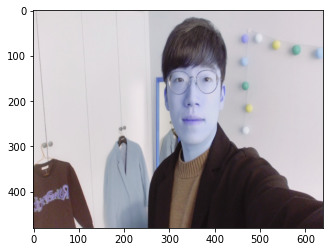

In [52]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

my_image_path = os.getenv('HOME')+'/workplace/aiffel/Exploration/10.camera_sticker/images/image.jpg'
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (640, 480))    # 640x360의 크기로 Resize
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관
plt.imshow(img_bgr)
plt.show()

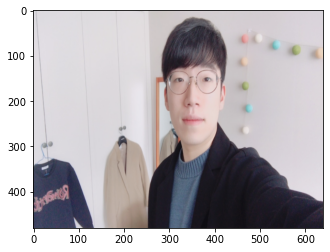

In [53]:
# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

### 2. 얼굴 검출 및 랜드마크

#### 2-1. 얼굴 검출

rectangles[[(276, 128) (425, 277)]]


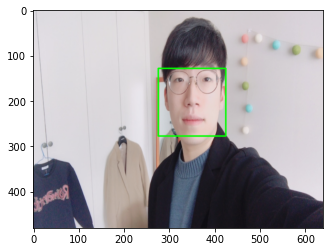

In [54]:
import dlib
detector_hog = dlib.get_frontal_face_detector()   #- detector 선언

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 5)   #- (image, num of img pyramid)

print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

#### 2-2. 얼굴 랜드마크

In [55]:
import os
model_path = os.getenv('HOME')+'/workplace/aiffel/Exploration/10.camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

In [56]:
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


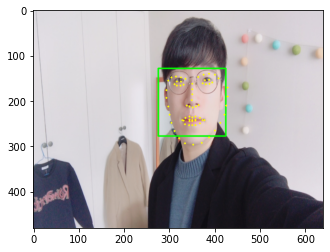

In [57]:
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

### 3. 스티커 적용 위치 확인하기
볼은 '턱', '눈', '입', '코' 사이에 있다는 점을 이용해 주세요. 비율로 계산하는 방법 잊지 않으셨죠?

[hint] 2, 36, 48, 30 번 인덱스를 이용

In [58]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # nose center index : 30
    x = landmark[30][0]
    y = landmark[30][1]
    w = dlib_rect.width()
    h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(350, 198)
(x,y) : (350,198)
(w,h) : (150,150)


In [59]:
sticker_path = os.getenv('HOME')+'/workplace/aiffel/Exploration/10.camera_sticker/images/cat.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

(150, 150, 3)


In [60]:
refined_x = x - w // 2  # left
refined_y = y - h//2   # top
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (275,123)


### 4. 스티커 적용하기

#### 4-1. np.where 를 사용해서 스티커를 적용해 주세요.

In [61]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

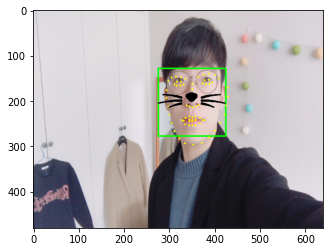

In [62]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

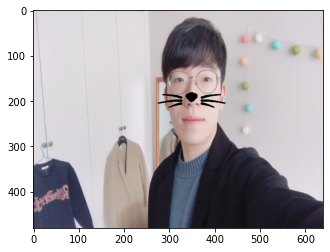

In [65]:
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

(x,y) : (418,491)
(w,h) : (268,268)
(x,y) : (284,357)
(x,y) : (284,357)
(268, 268, 3)


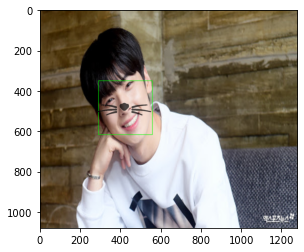

In [88]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
my_image_path = os.getenv('HOME')+'/workplace/aiffel/Exploration/10.camera_sticker/images/image4.jpg'
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (1280, 1080))    # 640x360의 크기로 Resize
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관
# plt.imshow(img_bgr)
# plt.show()
# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
# plt.imshow(img_rgb)
# plt.show()
# hog detector를 선언
import dlib
detector_hog = dlib.get_frontal_face_detector()   #- detector 선언
# print("🌫:flying_saucer:")
# detector를 이용해서 얼굴의 bounding box를 추출
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) # bgr -> rgb
dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)
# print("🌫:flying_saucer:")
# print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

# img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
# plt.imshow(img_show_rgb)
# plt.show()
import os
model_path = os.getenv('HOME')+'/workplace/aiffel/Exploration/10.camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
# print("🌫:flying_saucer:")
# landmark_predictor 는 RGB 이미지와 dlib.rectangle을 입력 받아 dlib.full_object_detection 를 반환

list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect) 
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

# print(len(list_landmarks[0]))
# for landmark in list_landmarks:
#     for idx, point in enumerate(list_points):
#         cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

# img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
# plt.imshow(img_show_rgb)
# plt.show()
# 좌표 확인
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):

    x = landmark[30][0]
    y = landmark[30][1]
    w = dlib_rect.width()
    h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))
# 스티커 읽어서 적용
import os
sticker_path = os.getenv('HOME')+'/workplace/aiffel/Exploration/10.camera_sticker/images/cat.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h)) # 이미지 크기를 w,h 에 맞춰 수정
# print (img_sticker.shape)
# x,y 좌표 조정
refined_x = x - w // 2  # left
refined_y = y - h // 2    # top

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))
# 원본 이미지 범위 벗어난 스티커 부분 제거
# # -y 크기만큼 스티터 crop
# img_sticker = img_sticker[-refined_y:]
# print (img_sticker.shape)
# top 의 y 좌표는 원본 이미지 경계 값으로 수정
# refined_y = 0
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))
print(img_sticker.shape)
# print(img_show[refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]])
# 원본 이미지에 스티커 적용


sticker_area = img_show[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
dst = cv2.addWeighted(img_bgr, 0.3, img_show, 0.7, 0)
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.show()
# # bounding box와 landmark를 제거하고 최종 결과만 출력
# sticker_area = img_bgr[refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
# img_bgr[refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
#     np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)
# plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
# plt.show()

#### 4-2. 스티커를 조금 더 자연스럽게 보이게 하려면 어떻게 해야 할까요? 스티커 뒤로 원본 이미지가 같이 보이도록 만들어 봅시다.
[hint] opencv 의 cv2.addWeighted() 를 참고하세요.

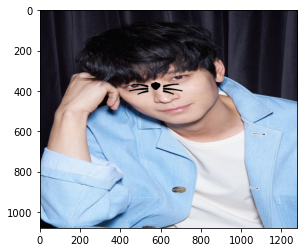

In [102]:
sticker_area = img_show[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
dst = cv2.addWeighted(img_bgr, 0.3, img_show, 0.7, 0)
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.show()

### 5. 문제점 찾아보기
#### 5-1. 셀프 카메라를 다양한 각도에서 촬영하면서 스티커를 반복해서 적용해 보세요.

68


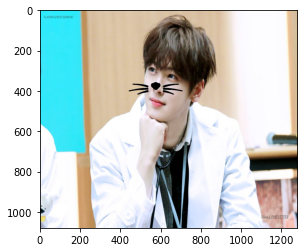

In [95]:
my_image_path = os.getenv('HOME')+'/workplace/aiffel/Exploration/10.camera_sticker/images/image5.jpg'
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (1280, 1080))    # 640x360의 크기로 Resize
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

detector_hog = dlib.get_frontal_face_detector()   #- detector 선언
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) # bgr -> rgb
dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

# img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
# plt.imshow(img_show_rgb)
# plt.show()
import os
model_path = os.getenv('HOME')+'/workplace/aiffel/Exploration/10.camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect) 
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

# img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
# plt.imshow(img_show_rgb)
# plt.show()

for dlib_rect, landmark in zip(dlib_rects, list_landmarks):

    x = landmark[30][0]
    y = landmark[30][1]
    w = dlib_rect.width()
    h = dlib_rect.width()
#     print ('(x,y) : (%d,%d)'%(x,y))
#     print ('(w,h) : (%d,%d)'%(w,h))
# 스티커 읽어서 적용
import os
sticker_path = os.getenv('HOME')+'/workplace/aiffel/Exploration/10.camera_sticker/images/cat.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h)) # 이미지 크기를 w,h 에 맞춰 수정
# print (img_sticker.shape)
# x,y 좌표 조정
refined_x = x - w // 2  # left
refined_y = y - h // 2    # top

# print ('(x,y) : (%d,%d)'%(refined_x, refined_y))
# print(img_sticker.shape)


# sticker_area = img_show[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
# img_show[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
#     np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
# dst = cv2.addWeighted(img_bgr, 0.3, img_show, 0.7, 0)
# plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
# plt.show()
# bounding box와 landmark를 제거하고 최종 결과만 출력
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

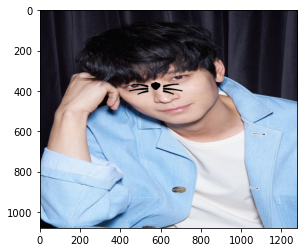

In [101]:
my_image_path = os.getenv('HOME')+'/workplace/aiffel/Exploration/10.camera_sticker/images/image2.jpg'
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (1280, 1080))    # 640x360의 크기로 Resize
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

detector_hog = dlib.get_frontal_face_detector()   #- detector 선언
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) # bgr -> rgb
dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

# img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
# plt.imshow(img_show_rgb)
# plt.show()
import os
model_path = os.getenv('HOME')+'/workplace/aiffel/Exploration/10.camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect) 
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

# print(len(list_landmarks[0]))
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

# img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
# plt.imshow(img_show_rgb)
# plt.show()

for dlib_rect, landmark in zip(dlib_rects, list_landmarks):

    x = landmark[30][0]
    y = landmark[30][1]
    w = dlib_rect.width()
    h = dlib_rect.width()
#     print ('(x,y) : (%d,%d)'%(x,y))
#     print ('(w,h) : (%d,%d)'%(w,h))
# 스티커 읽어서 적용
import os
sticker_path = os.getenv('HOME')+'/workplace/aiffel/Exploration/10.camera_sticker/images/cat.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h)) # 이미지 크기를 w,h 에 맞춰 수정
# print (img_sticker.shape)
# x,y 좌표 조정
refined_x = x - w // 2  # left
refined_y = y - h // 2    # top

# print ('(x,y) : (%d,%d)'%(refined_x, refined_y))
# print(img_sticker.shape)


# sticker_area = img_show[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
# img_show[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
#     np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
# dst = cv2.addWeighted(img_bgr, 0.3, img_show, 0.7, 0)
# plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
# plt.show()
# bounding box와 landmark를 제거하고 최종 결과만 출력
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

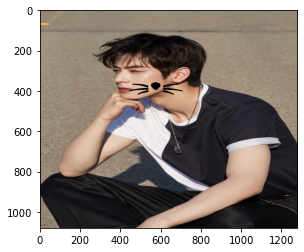

In [103]:
my_image_path = os.getenv('HOME')+'/workplace/aiffel/Exploration/10.camera_sticker/images/image6.jpg'
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (1280, 1080))    # 640x360의 크기로 Resize
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

detector_hog = dlib.get_frontal_face_detector()   #- detector 선언
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) # bgr -> rgb
dlib_rects = detector_hog(img_rgb, 2)   #- (image, num of img pyramid)

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

# img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
# plt.imshow(img_show_rgb)
# plt.show()
import os
model_path = os.getenv('HOME')+'/workplace/aiffel/Exploration/10.camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect) 
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

# print(len(list_landmarks[0]))
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

# img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
# plt.imshow(img_show_rgb)
# plt.show()

for dlib_rect, landmark in zip(dlib_rects, list_landmarks):

    x = landmark[30][0]
    y = landmark[30][1]
    w = dlib_rect.width()
    h = dlib_rect.width()
#     print ('(x,y) : (%d,%d)'%(x,y))
#     print ('(w,h) : (%d,%d)'%(w,h))
# 스티커 읽어서 적용
import os
sticker_path = os.getenv('HOME')+'/workplace/aiffel/Exploration/10.camera_sticker/images/cat.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h)) # 이미지 크기를 w,h 에 맞춰 수정
# print (img_sticker.shape)
# x,y 좌표 조정
refined_x = x - w // 2  # left
refined_y = y - h // 2    # top

# print ('(x,y) : (%d,%d)'%(refined_x, refined_y))
# print(img_sticker.shape)


# sticker_area = img_show[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
# img_show[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
#     np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
# dst = cv2.addWeighted(img_bgr, 0.3, img_show, 0.7, 0)
# plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
# plt.show()
# bounding box와 landmark를 제거하고 최종 결과만 출력
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

#### 5-2. 문제점이 무엇인지 최대한 자세하게 기록해 보세요. 여러분이 생각한 문제점을 해결하기 위한 방법은 분명 존재합니다!

#### 문제
- 얼굴의 한쪽 측면만 보여주면 얼굴로 인식을 못한다.
    - 얼굴 위의 점을 기준으로 작동하기 때문에 얼굴 전체가 나아야만 한다.
    - 대부분의 얼굴 필터 어플리케이션에서도 동일하게 발생하는 문제인데 당연하다고 생각한다.
- 해상도가 낮을 시 detector 가 작동하지 않는다.
    - 해상도를 높인다.
    - 하이퍼 파라미터를 증가
- 스티커가 얼굴 각도를 적용하지 않는다. 
    - 회전 함수 cv2.getRotationMatrix2D()을 이용한다.
- 주변 환경 색과 사람이 겹치면 작동하지 않는다.

### 평가

- 고양이 수염이 노란색으로 변한다.
    - img_sticker==1 로 변경해주었더니 검은색으로 바뀌었다.
- 수염 배경이 계속 흰색이다.
    - img_sticker==255 로 변경했다.
- 고양이 수염이 내려오지 않는다.
    - 코의 위치 landmark[30] 를 기준으로 삼아 x와 y 좌표를 각각 refined_x = x - w // 2, refined_y = y - h // 2 으로 수정해주었다.
    - 왕관 예시와 달리 잘리는 부분을 고려할 필요가 없어 refined_y를 0으로 지정할 이유가 없었기 때문에 삭제했다.
    - sticker area 와 img_show, img_bgr 의 y 범위를 [refined_y:refined_y+img_sticker.shape[0]] 로 수정했다.
- dst = cv2.addWeighted(img_bgr, 0.3, img_show, 0.7, 0) 에서 사진 두 장의 알파 값이 1이 되어야 한다.

#### 이렇게 글로만 적으니 별 문제 없었던 것 같지만 수염 배경색과 고양이 수염 위치 때문에 하루 종일을 투자해야만 했다. 코드를 해석하는 능력을 좀 더 키워야겠다.